In this study, I will evaluate the effectiveness of Fairy-type Pokémon as a counter to Dragon-type Pokémon. With the introduction of Fairy-type Pokémon, Dragon-type Pokémon now have a type that they are vulnerable to. This study aims to determine the usefulness of Fairy-type Pokémon in battles against Dragon-type Pokémon. I will assess whether Fairy-types are stronger on their own, or if they are still dependent on other Pokémon types.

To measure the effectiveness of Fairy-types, I will use the following metrics:

- Type 1: Each Pokémon has a specific type that determines its weaknesses and resistances to different attacks.
- Type 2: Some Pokémon have dual types.
- Total: A summary of the Pokémon's overall strength, calculated as the sum of all its stats.
- HP: A measurement of how much damage a Pokémon can endure before fainting.
- Attack: The base modifier for normal attacks.
- Defense: The base resistance to normal attacks.
- SP Atk: The base modifier for special attacks.
- SP Def: The base resistance to special attacks.
- Speed: The determining factor for which Pokémon attacks first each round.

The results of this study will assist Pokémon players in making informed decisions about whether to use a Fairy-type or Dragon-type Pokémon in battles against teams with a heavy presence of Dragon-types.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
import squarify
import plotly.express as px
import plotly.graph_objects as go

# Setting seaborn style.
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette("colorblind")

# Data Wrangling
## Process
1. Remove irrelevant data.
2. Deduplicate the data.
3. Fix structural errors.
4. Deal with missing data.
5. Filter out outliers.
6. Validate the data.

In [2]:
# Reading in the data.
all_pokemon = pd.read_csv('Pokemon.csv')

In [3]:
# Viewing the data
all_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Irrelevant columns to drop: Generation and Legendary
pokemon = all_pokemon.drop(['Legendary','Generation'], axis=1)

In [5]:
# Viewing new dataframe
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [6]:
# 50 dragon types
# 40 fairy types
# 1 dragon-fairy type
pokemon[(pokemon['Type 1'] == 'Fairy') | (pokemon['Type 2'] == 'Fairy')].count()
pokemon[(pokemon['Type 1'] == 'Dragon') & (pokemon['Type 2'] == 'Fairy')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
366,334,AltariaMega Altaria,Dragon,Fairy,590,75,110,110,110,105,80


In [7]:
# Remove pokemon that aren't dragon or fairy type in either type categories.
# If type 1 or type 2 is not Dragon or Fairy, remove it from the pokemon dataframe.
dragon_fairy_pokemon = pokemon[(pokemon['Type 1'] == 'Dragon') | (pokemon['Type 2'] == 'Dragon') | 
        (pokemon['Type 1'] == 'Fairy') | (pokemon['Type 2'] == 'Fairy')]

dragon_fairy_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100
40,35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
...,...,...,...,...,...,...,...,...,...,...,...
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50


In [8]:
# Search for duplicates
duplicates = dragon_fairy_pokemon[dragon_fairy_pokemon.duplicated()]
duplicates

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed


In [9]:
# Fixing structural errors
dragon_fairy_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100
40,35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
...,...,...,...,...,...,...,...,...,...,...,...
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50


In [10]:
# Filter out mega pokemon
discard = ['Mega']
dragon_fairy_pokemon = dragon_fairy_pokemon[~dragon_fairy_pokemon['Name'].str.contains('|'.join(discard))]

In [11]:
dragon_fairy_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
40,35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90
...,...,...,...,...,...,...,...,...,...,...,...
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95


In [12]:
# Count NaNs and replace NaN with "None"
dragon_fairy_pokemon.isna().sum()

# 0
Name 0
Type 1 0
Type 2 26
Total 0
HP 0
Attack 0
Defense 0
Sp. Atk 0
Sp. Def 0
Speed 0
dtype: int64

In [13]:
# Replace NaNs in Type 2 column with "None"
dragon_fairy_pokemon['Type 2'] = dragon_fairy_pokemon['Type 2'].fillna('None')

<ipython-input-13-5117ddd57673>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dragon_fairy_pokemon['Type 2'] = dragon_fairy_pokemon['Type 2'].fillna('None')


In [14]:
dragon_fairy_pokemon.isna().sum()

# 0
Name 0
Type 1 0
Type 2 0
Total 0
HP 0
Attack 0
Defense 0
Sp. Atk 0
Sp. Def 0
Speed 0
dtype: int64

In [15]:
dragon_fairy_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
40,35,Clefairy,Fairy,None,323,70,45,48,60,65,35
41,36,Clefable,Fairy,None,483,95,70,73,95,90,60
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90
...,...,...,...,...,...,...,...,...,...,...,...
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123
792,716,Xerneas,Fairy,None,680,126,131,95,131,98,99
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95


In [16]:
# Dropping the number category
dragon_fairy_pokemon = dragon_fairy_pokemon.drop(['#'], axis=1)

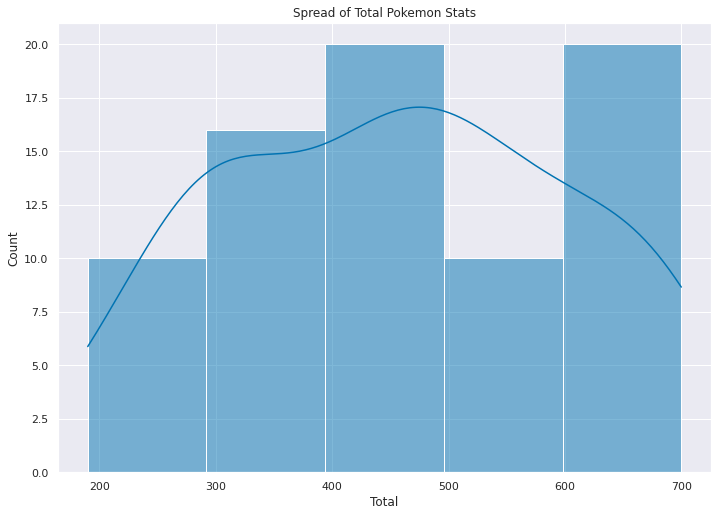

In [17]:
# Searching for outliers using the Total column
sns.histplot(data=dragon_fairy_pokemon, 
             x='Total',
             bins=5,
             kde=True)
plt.title('Spread of Total Pokemon Stats')
plt.show()

# This dataset has a large number of occurances in the upper value cells.

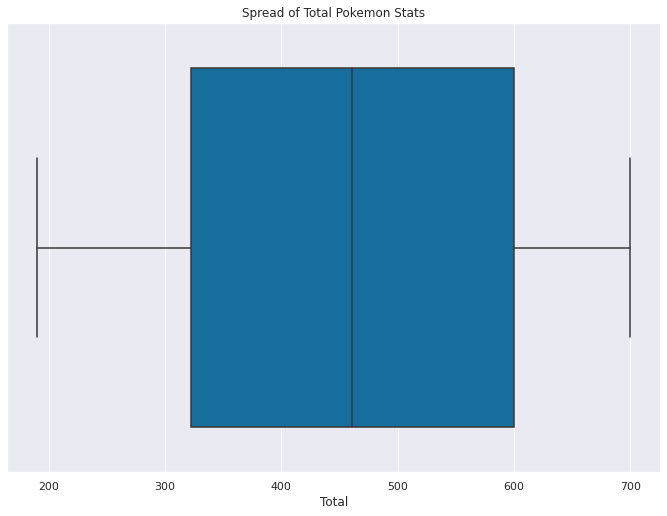

In [18]:
sns.boxplot(data=dragon_fairy_pokemon, x="Total")
plt.title('Spread of Total Pokemon Stats')
plt.show()

# The median for dragon and fairy type summary stats is around 450. The quartiles are around 320 and 600.  

In [19]:
# Searching for outliers by finding the IQR of the Total column
# q1 = median
# q2 = median of the smallest points
# q3 = median of the highest points
# IQR = range between Q1 and Q2
# outlier = data points below Q1 - 1.5 IQR or above Q3 + 1.5 IQR
q1 = np.percentile(dragon_fairy_pokemon['Total'], 25, interpolation='midpoint')
q2 = np.percentile(dragon_fairy_pokemon['Total'], 50, interpolation='midpoint')
q3 = np.percentile(dragon_fairy_pokemon['Total'], 75, interpolation='midpoint')
iqr = q3 - q1

low_lim = q1 - 1.5 * iqr
up_lim = q3 + 1.5 * iqr

print(f'25th percentile is {q1}, 50th percentile is {q2}, 75th percentile is {q3} and the IQR is {iqr}.')
print(f'The lower limit is {low_lim}, and the upper limit is {up_lim}.')

25th percentile is 321.5, 50th percentile is 461.0, 75th percentile is 600.0 and the IQR is 278.5.
The lower limit is -96.25, and the upper limit is 1017.75.


In [20]:
# Finding outliers based on the upper and lower limits in the dataset.
outlier = []

for x in dragon_fairy_pokemon['Total']:
    if (x > up_lim) or (x < low_lim):
        outlier.append(x)

if len(outlier) == 0:
    print('No outliers found.')
else:
    print(f'The outliers in this list are: {outlier}')

No outliers found.


In [21]:
# Validating the data
dragon_fairy_pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
40,Clefairy,Fairy,None,323,70,45,48,60,65,35
41,Clefable,Fairy,None,483,95,70,73,95,90,60
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
131,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90
...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123
792,Xerneas,Fairy,None,680,126,131,95,131,98,99
794,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95


In [22]:
# Validating dataset
# Removing periods, percent signs, and numbers from Name column
dragon_fairy_pokemon.replace('[%,.,\d]', '', regex=True, inplace=True)

In [23]:
dragon_fairy_pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
40,Clefairy,Fairy,None,323,70,45,48,60,65,35
41,Clefable,Fairy,None,483,95,70,73,95,90,60
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90
...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123
792,Xerneas,Fairy,None,680,126,131,95,131,98,99
794,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95


In [24]:
# Changing Forme to Form
dragon_fairy_pokemon['Name'].replace('Forme', 'Form', regex=True, inplace=True)

In [25]:
dragon_fairy_pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
40,Clefairy,Fairy,None,323,70,45,48,60,65,35
41,Clefable,Fairy,None,483,95,70,73,95,90,60
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90
...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123
792,Xerneas,Fairy,None,680,126,131,95,131,98,99
794,Zygarde Form,Dragon,Ground,600,108,100,121,81,95,95


In [26]:
# Removing extra Kyurem
dragon_fairy_pokemon['Name'].replace('KyuremBlack', 'Black', regex=True, inplace=True)
dragon_fairy_pokemon['Name'].replace('KyuremWhite', 'White', regex=True, inplace=True)

In [27]:
dragon_fairy_pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
40,Clefairy,Fairy,None,323,70,45,48,60,65,35
41,Clefable,Fairy,None,483,95,70,73,95,90,60
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90
...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123
792,Xerneas,Fairy,None,680,126,131,95,131,98,99
794,Zygarde Form,Dragon,Ground,600,108,100,121,81,95,95


In [28]:
# Fixed Giratina entry
dragon_fairy_pokemon['Name'].replace('GiratinaOrigin Form', 'Giratina', regex=True, inplace=True)
dragon_fairy_pokemon['Name'].replace('GiratinaAltered Form', 'Altered Giratina', regex=True, inplace=True)

In [29]:
dragon_fairy_pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
40,Clefairy,Fairy,None,323,70,45,48,60,65,35
41,Clefable,Fairy,None,483,95,70,73,95,90,60
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90
...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123
792,Xerneas,Fairy,None,680,126,131,95,131,98,99
794,Zygarde Form,Dragon,Ground,600,108,100,121,81,95,95


# Exploratory Data Analysis
## Questions to be Explored
#### How useful has the inclusion of fairy type Pokémon been? 
#### Are they stronger than dragon type Pokémon on their own? 
#### Based on the features provided by the data, are fairy-type Pokémon needed?

## Descriptive Statistics

### Measures of Central Tendency

In [30]:
# Splitting the dataset into two datasets: dragon type and fairy type only.

dragon = dragon_fairy_pokemon[(dragon_fairy_pokemon['Type 1'] == 'Dragon') | 
                        (dragon_fairy_pokemon['Type 2'] == 'Dragon')]

fairy = dragon_fairy_pokemon[(dragon_fairy_pokemon['Type 1'] == 'Fairy') | 
                        (dragon_fairy_pokemon['Type 2'] == 'Fairy')]

print(f'There are {dragon.Name.count()} dragon types and {fairy.Name.count()} fairy types.')

There are 41 dragon types and 35 fairy types.


In [31]:
# Getting the mean of the Total column for dragon and fairy type pokemon.

def get_centralt(x, y):
    """
    Gets the mean of the Total column. 
    x is the dataframe. 
    y is the Pokemon type as a string.
    """
    mean = statistics.mean(x.Total)
    median = statistics.median(x.Total)
    mode = statistics.mode(x.Total)
    return print(f'Central tendency for {y} type Pokemon...\nmode: {mode}  median:{median}  mean: {mean} \n')

get_centralt(fairy, 'fairy')
get_centralt(dragon, 'dragon')

# Overall, fairy types may prove to be weaker. 
        

Central tendency for fairy type Pokemon...
mode: 480  median:405  mean: 391.54285714285714 

Central tendency for dragon type Pokemon...
mode: 600  median:535  mean: 513.2682926829268 



### Measures of Variability

In [32]:
# A function for finding the measures of variability of each dataset.

def get_var(data, poke_type):
    var = statistics.variance(data.Total)
    std = statistics.stdev(data.Total)
    q1 = np.percentile(data.Total, 25, interpolation='midpoint')
    q2 = np.percentile(data.Total, 50, interpolation='midpoint')
    q3 = np.percentile(data.Total, 75, interpolation='midpoint')
    iqr = q3 - q1
    return print(f'The measures of variability for the total stats of {poke_type} type pokemon... \n variance: {var} std: {std} IQR: {iqr} \n')

get_var(dragon, 'dragon')
get_var(fairy, 'fairy')

The measures of variability for the total stats of dragon type pokemon... 
 variance: 19764.551219512196 std: 140.58645460894232 IQR: 190.0 

The measures of variability for the total stats of fairy type pokemon... 
 variance: 15446.961344537815 std: 124.28580508061978 IQR: 190.0 



## Summary of Descriptive Statistics

In [33]:
# Dragon type summary
dragon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,513.268293,82.048780,100.439024,82.073171,87.853659,83.048780,77.804878
std,140.586455,27.671241,30.105688,23.446098,37.866582,28.852167,22.771934
min,245.000000,40.000000,30.000000,35.000000,30.000000,30.000000,38.000000
25%,410.000000,65.000000,75.000000,65.000000,55.000000,55.000000,57.000000
50%,535.000000,80.000000,100.000000,90.000000,81.000000,90.000000,82.000000
75%,600.000000,100.000000,120.000000,95.000000,120.000000,100.000000,95.000000
max,700.000000,150.000000,170.000000,121.000000,170.000000,150.000000,123.000000


In [34]:
# Fairy type summary
fairy.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,391.542857,68.371429,55.514286,65.142857,71.142857,78.685714,52.685714
std,124.285805,27.808257,27.232519,30.042267,28.972749,34.986360,25.529420
min,190.000000,20.000000,20.000000,15.000000,20.000000,20.000000,15.000000
25%,290.000000,50.000000,36.500000,46.000000,47.500000,55.000000,37.500000
50%,405.000000,62.000000,50.000000,65.000000,65.000000,75.000000,50.000000
75%,480.000000,87.500000,70.000000,82.500000,90.000000,98.000000,69.000000
max,680.000000,140.000000,131.000000,150.000000,131.000000,154.000000,116.000000


## Visualizing the Data

In [35]:
dragon_fairy_pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
40,Clefairy,Fairy,None,323,70,45,48,60,65,35
41,Clefable,Fairy,None,483,95,70,73,95,90,60
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90
...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123
792,Xerneas,Fairy,None,680,126,131,95,131,98,99
794,Zygarde Form,Dragon,Ground,600,108,100,121,81,95,95


In [36]:
# Add new column featuring a binary showcasing if the pokemon is mainly dragon or fairy type.
binary_dragon_fairy = dragon_fairy_pokemon
binary_dragon_fairy['Dragon_or_fairy'] = ''
binary_dragon_fairy

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Dragon_or_fairy
40,Clefairy,Fairy,None,323,70,45,48,60,65,35,
41,Clefable,Fairy,None,483,95,70,73,95,90,60,
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,
...,...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123,
792,Xerneas,Fairy,None,680,126,131,95,131,98,99,
794,Zygarde Form,Dragon,Ground,600,108,100,121,81,95,95,


In [37]:
# Populate the Dragon_or_fairy column based on Type 1 and Type 2 columns.
binary_dragon_fairy['Dragon_or_fairy'] = np.where(((binary_dragon_fairy['Type 1'] == 'Dragon') |
                                                   (binary_dragon_fairy['Type 2'] == 'Dragon')), 'Dragon', 'Fairy')

In [38]:
binary_dragon_fairy

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Dragon_or_fairy
40,Clefairy,Fairy,None,323,70,45,48,60,65,35,Fairy
41,Clefable,Fairy,None,483,95,70,73,95,90,60,Fairy
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,Fairy
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,Fairy
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,Fairy
...,...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,Dragon
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123,Dragon
792,Xerneas,Fairy,None,680,126,131,95,131,98,99,Fairy
794,Zygarde Form,Dragon,Ground,600,108,100,121,81,95,95,Dragon


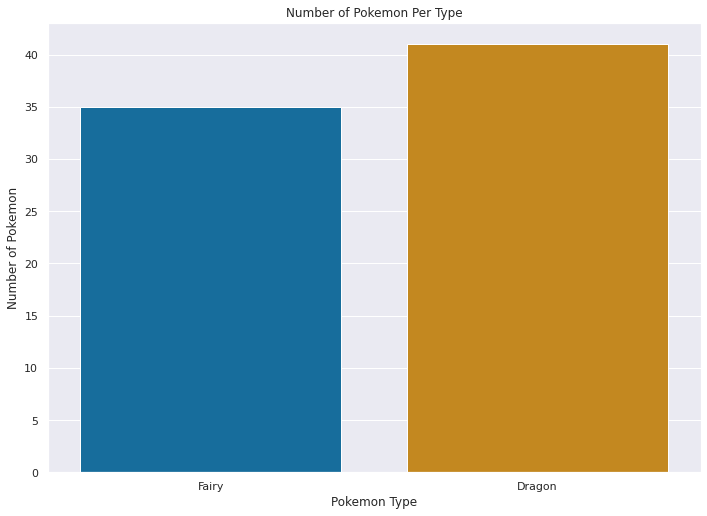

In [39]:
# Visualize the count of dragon type versus fairy type pokemon.

sns.countplot(data=binary_dragon_fairy,
              x='Dragon_or_fairy')
plt.xlabel('Pokemon Type')
plt.ylabel('Number of Pokemon')
plt.title('Number of Pokemon Per Type')
plt.show()

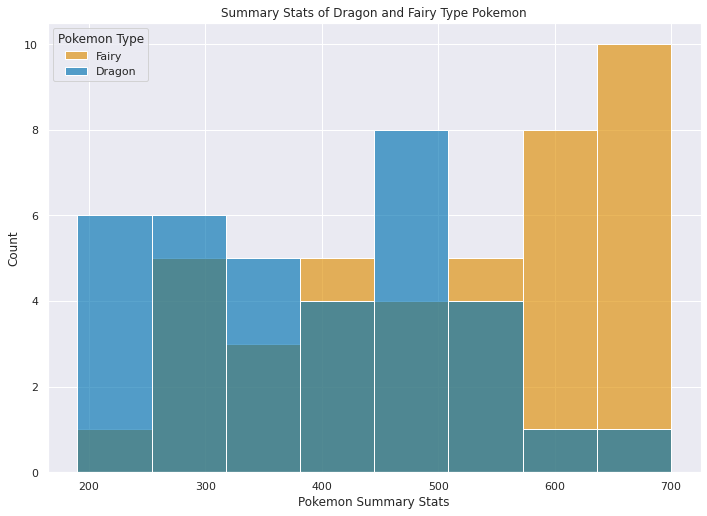

In [40]:
# Comparing dragon and fairy type total stats.
sns.histplot(data=binary_dragon_fairy,
             x='Total',
             hue='Dragon_or_fairy',
             legend=False,
             alpha=0.65)
plt.legend(title='Pokemon Type', labels=['Fairy', 'Dragon'])
plt.title('Summary Stats of Dragon and Fairy Type Pokemon')
plt.xlabel('Pokemon Summary Stats')
plt.show()

# Fairy type pokemon trend toward the upper limit when it comes to their summary stats. Dragon type stats are more spread out.
# Fairy types may tend to be glass cannons, while dragon types may be more tanky.

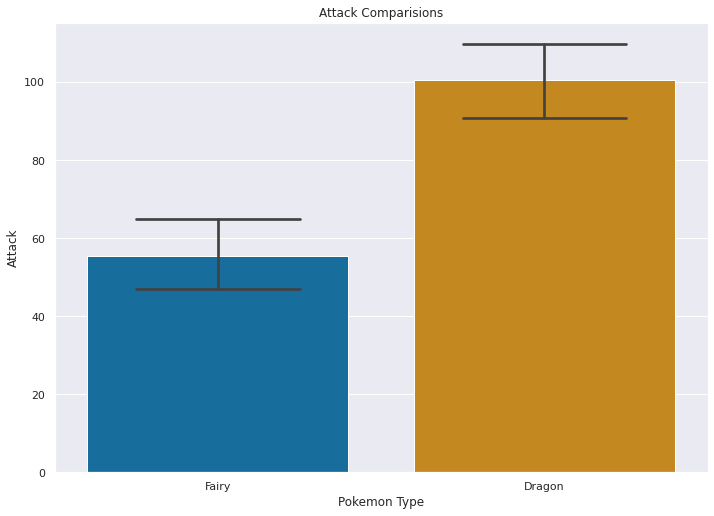

In [41]:
# Compare dragon type Attack to fairy type Attack
sns.barplot(data=binary_dragon_fairy,
            x=binary_dragon_fairy.Dragon_or_fairy,
            y=binary_dragon_fairy.Attack,
            capsize=0.5)
plt.xlabel('Pokemon Type')
plt.title('Attack Comparisions')
plt.show()

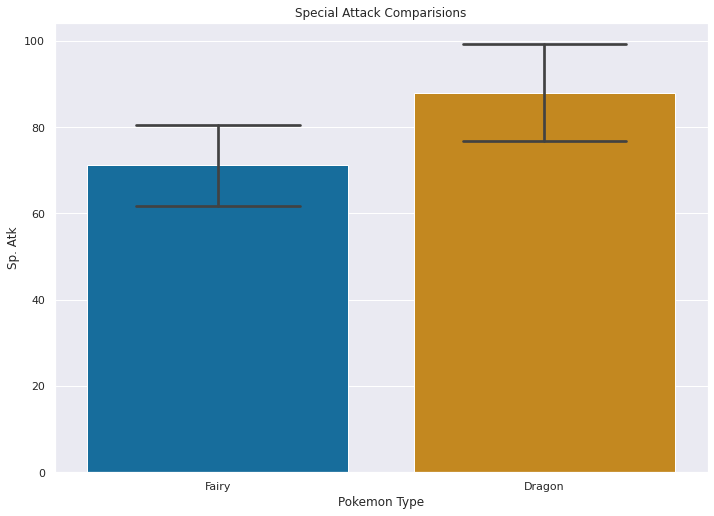

In [42]:
# Compare their special attack stats.
sns.barplot(data=binary_dragon_fairy,
            x=binary_dragon_fairy.Dragon_or_fairy,
            y=binary_dragon_fairy['Sp. Atk'],
            capsize=0.5)
plt.xlabel('Pokemon Type')
plt.title('Special Attack Comparisions')
plt.show()

In [43]:
binary_dragon_fairy

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Dragon_or_fairy
40,Clefairy,Fairy,None,323,70,45,48,60,65,35,Fairy
41,Clefable,Fairy,None,483,95,70,73,95,90,60,Fairy
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,Fairy
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,Fairy
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,Fairy
...,...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,Dragon
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123,Dragon
792,Xerneas,Fairy,None,680,126,131,95,131,98,99,Fairy
794,Zygarde Form,Dragon,Ground,600,108,100,121,81,95,95,Dragon


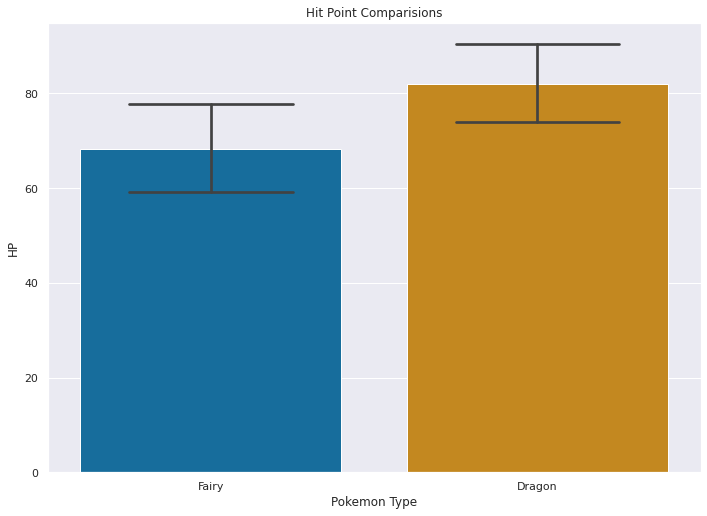

In [44]:
# Compare HP
sns.barplot(data=binary_dragon_fairy,
            x=binary_dragon_fairy.Dragon_or_fairy,
            y=binary_dragon_fairy['HP'],
            capsize=0.5)
plt.xlabel('Pokemon Type')
plt.title('Hit Point Comparisions')
plt.show()

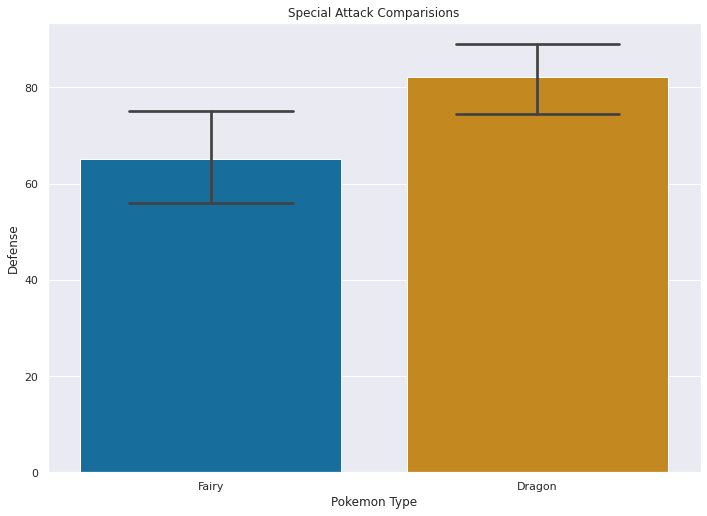

In [45]:
# Compare defense.
sns.barplot(data=binary_dragon_fairy,
            x=binary_dragon_fairy.Dragon_or_fairy,
            y=binary_dragon_fairy['Defense'],
            capsize=0.5)
plt.xlabel('Pokemon Type')
plt.title('Special Attack Comparisions')
plt.show()

In [46]:
binary_dragon_fairy

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Dragon_or_fairy
40,Clefairy,Fairy,None,323,70,45,48,60,65,35,Fairy
41,Clefable,Fairy,None,483,95,70,73,95,90,60,Fairy
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,Fairy
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,Fairy
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,Fairy
...,...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,Dragon
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123,Dragon
792,Xerneas,Fairy,None,680,126,131,95,131,98,99,Fairy
794,Zygarde Form,Dragon,Ground,600,108,100,121,81,95,95,Dragon


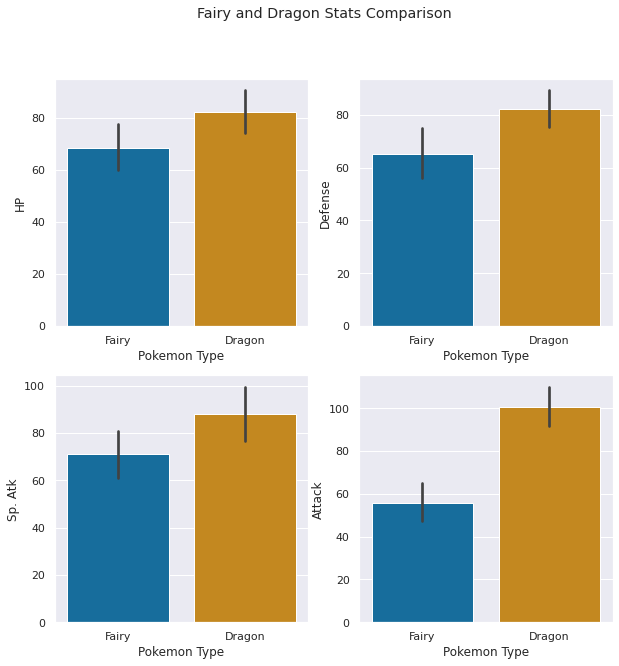

In [47]:
# Bringing the stats together.
fig, axes = plt.subplots(2, 2, figsize=(10,10))

sns.barplot(data=binary_dragon_fairy, x="Dragon_or_fairy", y="HP", ax=axes[0,0])
sns.barplot(data=binary_dragon_fairy, x="Dragon_or_fairy", y="Defense", ax=axes[0,1])
sns.barplot(data=binary_dragon_fairy, x="Dragon_or_fairy", y="Sp. Atk", ax=axes[1,0])
sns.barplot(data=binary_dragon_fairy, x="Dragon_or_fairy", y="Attack", ax=axes[1,1])

axes[0,0].set_xlabel('Pokemon Type')
axes[0,1].set_xlabel('Pokemon Type')
axes[1,0].set_xlabel('Pokemon Type')
axes[1,1].set_xlabel('Pokemon Type')

plt.suptitle('Fairy and Dragon Stats Comparison')
plt.show()

It seems that in almost every avenue, the dragon type pokemon outclasses the fairy type pokemon. 

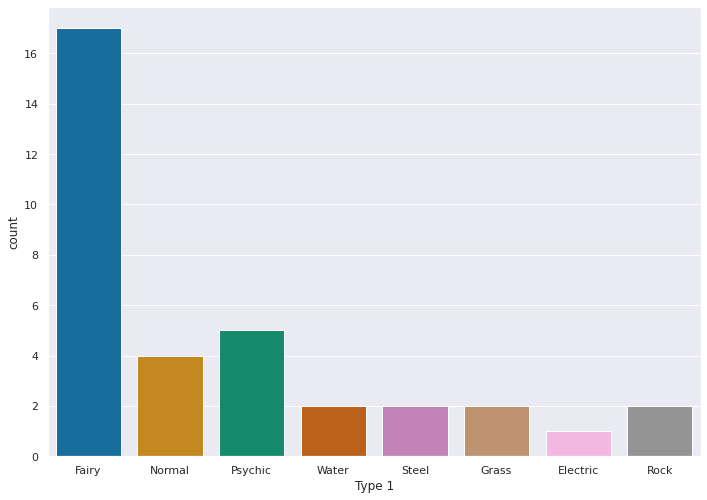

In [48]:
sns.countplot(data=fairy, x=fairy['Type 1'])
plt.show()


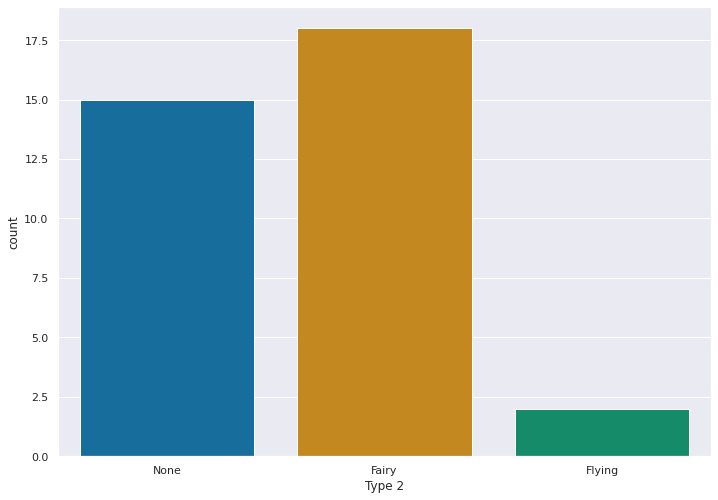

In [49]:
sns.countplot(data=fairy, x=fairy['Type 2'])
plt.show()

In [50]:
# Type 1 counts
fairy[fairy['Type 1'] == 'Psychic'].count() #5
fairy[fairy['Type 1'] == 'Normal'].count() #4
fairy[fairy['Type 1'] == 'Water'].count() #2
fairy[fairy['Type 1'] == 'Steel'].count() #2
fairy[fairy['Type 1'] == 'Grass'].count() #2
fairy[fairy['Type 1'] == 'Electric'].count() #1
fairy[fairy['Type 1'] == 'Rock'].count() #2

# Type 2 counts
fairy[fairy['Type 2'] == 'None'].count() #15
fairy[fairy['Type 2'] == 'Flying'].count() #2

# Validating data
5 + 4 + (2 * 3) + 1 + 2 + 15 + 2

# Creating data for treemap
labels = ['Psychic', 'Normal', 'Water', 'Steel', 'Grass', 'Electric', 'Rock', 'None', 'Flying']
fairy_nums = [5, 4, 2, 2, 2, 1, 2, 15, 2]

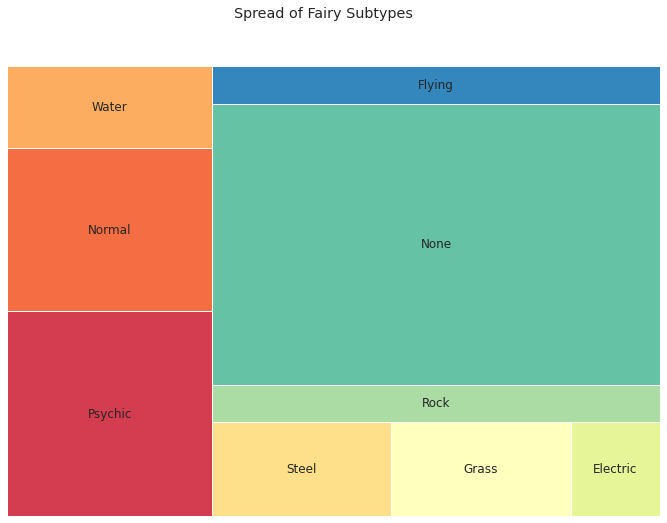

In [51]:
# Looking squarely at fairy type pokemon and their subtypes.
squarify.plot(sizes=fairy_nums, label=labels, color=sns.color_palette('Spectral',len(fairy_nums)))
plt.axis('off')
plt.suptitle('Spread of Fairy Subtypes')
plt.show()

# Most fairy types are pure fairy types.

In [52]:
fairy

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
40,Clefairy,Fairy,None,323,70,45,48,60,65,35
41,Clefable,Fairy,None,483,95,70,73,95,90,60
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90
187,Cleffa,Fairy,None,218,50,25,28,45,55,15
188,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15
189,Togepi,Fairy,None,245,35,20,65,40,65,20
190,Togetic,Fairy,Flying,405,55,40,85,80,105,40
198,Marill,Water,Fairy,250,70,20,50,20,50,40


In [53]:
# What do the stats look like among the normal fairy types?

# Create a new fairy dataframe and drop the total column
pure_fairy = fairy.drop(['Total'], axis=1)

In [54]:
# Filter the dataframe to only include pure fairy types
pure_fairy = pure_fairy[(pure_fairy['Type 1'] == 'None') | (pure_fairy['Type 2'] == 'None')]

In [55]:
pure_fairy

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
40,Clefairy,Fairy,None,70,45,48,60,65,35
41,Clefable,Fairy,None,95,70,73,95,90,60
187,Cleffa,Fairy,None,50,25,28,45,55,15
189,Togepi,Fairy,None,35,20,65,40,65,20
225,Snubbull,Fairy,None,60,80,50,40,40,30
226,Granbull,Fairy,None,90,120,75,60,60,45
737,Flabébé,Fairy,None,44,38,39,61,79,42
738,Floette,Fairy,None,54,45,47,75,98,52
739,Florges,Fairy,None,78,65,68,112,154,75
752,Spritzee,Fairy,None,78,52,60,63,65,23


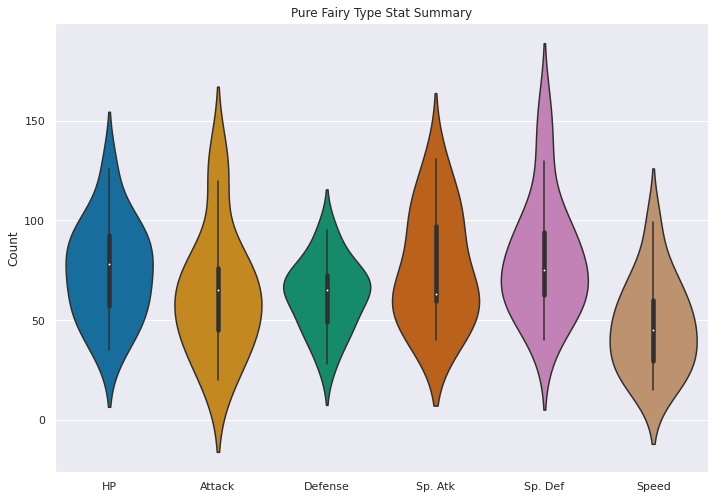

In [56]:
# Compare the stats of the pure fairies.

sns.violinplot(data=pure_fairy,
               scale='count')
plt.title('Pure Fairy Type Stat Summary')
plt.ylabel('Count')
plt.show()

# Their highest stat is special defense.

In [57]:
# How do pure fairy types size up against the other fairy tyles?
# Create a new dataframe that tags pure fairy types

# Dropping the Total column
pure_fairy_labels = fairy.drop(['Total'], axis=1)

In [58]:
# Creating a new column.
pure_fairy_labels['Pure Fairy Type?'] = np.where((fairy['Type 1'] == 'None') 
                                                 | (fairy['Type 2'] == 'None'), 'Yes', 'No')

In [59]:
pure_fairy_labels[pure_fairy_labels['Pure Fairy Type?'] == 'Yes'].count()

Name 15
Type 1 15
Type 2 15
HP 15
Attack 15
Defense 15
Sp. Atk 15
Sp. Def 15
Speed 15
Pure Fairy Type? 15
dtype: int64

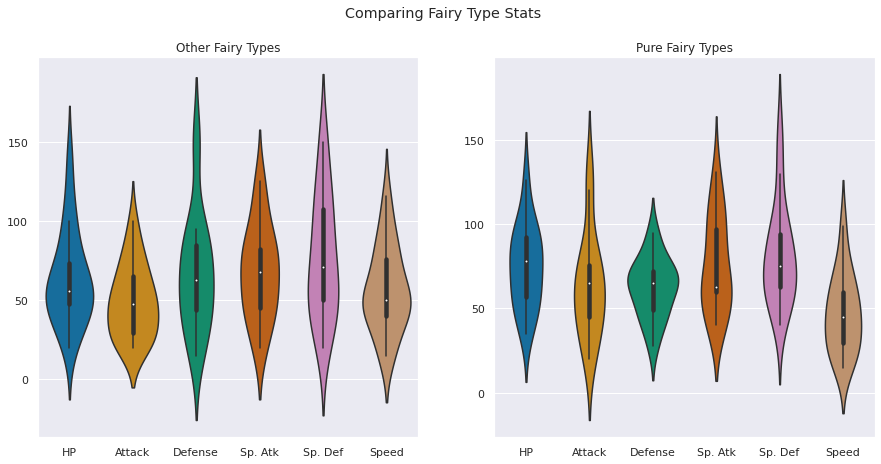

In [60]:
fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.violinplot(data=pure_fairy_labels[pure_fairy_labels['Pure Fairy Type?'] == 'No'],
               ax=axes[0]).set(title='Other Fairy Types')
sns.violinplot(data=pure_fairy_labels[pure_fairy_labels['Pure Fairy Type?'] == 'Yes'],
               ax=axes[1]).set(title='Pure Fairy Types')

plt.suptitle('Comparing Fairy Type Stats')
axes[0].set_yticks([0,50,100,150])

plt.show()

# Other fairy types excel in HP, defense, and attack.
# Pure fairy types excel at special attack, and special defense. They fall short in the defense area. 

In [61]:
# What is the strongest fairy type?

# Use the Total column to find the strongest fairy type pokemon.
max_num = max(fairy['Total']) # 680

# Find the fairy type pokemon with the 680 Total number.
strongest_fairy = fairy[fairy['Total'] == max_num] #Xerneas

strongest_fairy

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
792,Xerneas,Fairy,None,680,126,131,95,131,98,99


In [62]:
# Make a radar chart for the strongest fairy type pokemon
labels = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

# Change strongest fairy to a list.
f_list = strongest_fairy.values.tolist()

f_list_1 = f_list[0]

# Slice the list to only include labels according to the array
fairy_stats = f_list_1[4:10]

f_list_1

['Xerneas', 'Fairy', 'None', 680, 126, 131, 95, 131, 98, 99]

In [63]:
# Draw the radar chart.
fig = px.line_polar(strongest_fairy, r=fairy_stats, theta=labels
                    ,line_close=True, template='seaborn', title='Xerneas Stats', width=800, height=600,
                    range_r=[0,160])
fig.update_traces(fill='toself')

fig.show()

# Xerneas excels in HP, attack, and special attack.

In [64]:
# How does Xerneas size up against the strongest dragon type?

# Find the strongest dragon type.
# Use the Total column to find the strongest dragon type pokemon.
dmax_num = max(dragon['Total']) # 700

# Find the dragon type pokemon with the above number.
strongest_dragon = dragon[dragon['Total'] == dmax_num] # Black and white Kyurem
strongest_dragon1 = strongest_dragon.iloc[[0]]
strongest_dragon2 = strongest_dragon.iloc[[1]]

strongest_dragon1 #Black Kyurem
strongest_dragon2 #White Kyurem

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
712,White Kyurem,Dragon,Ice,700,125,120,90,170,100,95


In [65]:
# Creating radar graph preparation.

# Change dragon dataframes to lists.
# 1 is black and 2 is white
d_list1 = strongest_dragon1.values.tolist()
d_list2 = strongest_dragon2.values.tolist()

d_list1 = d_list1[0]
d_list2 = d_list2[0]

# Slice the lists to only include labels according to the array
d1_stats = d_list1[4:10]
d2_stats = d_list2[4:10]

d1_stats

[125, 170, 100, 120, 90, 95]

In [66]:
# Draw the overlapping radar chart

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=d1_stats,
    theta=labels,
    fill='toself',
    name='Black Kyurem'
))

fig.add_trace(go.Scatterpolar(
    r=d2_stats,
    theta=labels,
    fill='toself',
    name='White Kyurem'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True,
  title="Black and White Kyurem Stats",
  template='seaborn',
  width=800,
  height=600
)

fig.show()

# White Kyurem excels in special attack while black kyurem excels in attack. 

In [67]:
# Comparing the Kyurems to Xerneas.

# Draw the overlapping radar chart

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=d1_stats,
    theta=labels,
    fill='toself',
    name='Black Kyurem'
))

fig.add_trace(go.Scatterpolar(
    r=fairy_stats,
    theta=labels,
    fill='toself',
    name='Xerneas'
))

fig.add_trace(go.Scatterpolar(
    r=d2_stats,
    theta=labels,
    fill='toself',
    name='White Kyurem'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=True,
  title="Comparing Kyurem and Xerneas Stats",
  template='seaborn',
  width=800,
  height=600,
  title_xanchor='auto'
)

fig.show()

# When it comes to HP, these three pokemon are similar. 
# Xerneas beats White Kyurem in the attack stat. It also beats Black Kyurem in the special attack stat, but only by inches.
# White Kyurem beats Xerneas in the special attack stat.
# Black Kyurem beats Xernias in the attack stat.
# When it comes to spead, Xerneas bests both Kyurems.
# Xerneas is only mildly better than the stats it does beat either Kyurem in. 

In [68]:
# Comparing Xerneas to a dragon type with a similar total amount.
strongest_fairy
dragon[dragon['Total'] == 680] # 7 populate

# Dragon types with a total of 680 share a similar make-up.

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
425,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95
540,Dialga,Steel,Dragon,680,100,120,120,150,100,90
541,Palkia,Water,Dragon,680,90,120,100,150,120,100
544,Altered Giratina,Ghost,Dragon,680,150,100,120,100,120,90
545,Giratina,Ghost,Dragon,680,150,120,100,120,100,90
706,Reshiram,Dragon,Fire,680,100,120,100,150,120,90
707,Zekrom,Dragon,Electric,680,100,150,120,120,100,90


In [69]:
# Separating out Rayquaza
rayquaza = dragon[dragon['Name'] == 'Rayquaza']
rayquaza

# Dropping the total column
rayquaza.drop(['Total'], axis=1, inplace=True)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
rayquaza

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
425,Rayquaza,Dragon,Flying,105,150,90,150,90,95


In [71]:
# Writing a function to return a pokemon stats list
def get_stats(df):
    df_list = df.values.tolist()
    df_list1 = df_list[0]
    stats = df_list1[4:10]
    return stats

In [72]:
rayquaza_stats = get_stats(rayquaza)
rayquaza_stats

[150, 90, 150, 90, 95]

In [73]:
# A function to return an overlapping radar chart

def compare_stats(stats1, stats2, name1, name2):
    # Draw the overlapping radar chart
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=stats1,
        theta=labels,
        fill='toself',
        name=name1
    ))

    fig.add_trace(go.Scatterpolar(
        r=stats2,
        theta=labels,
        fill='toself',
        name=name2
    ))

    fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True
        )),
    showlegend=True,
    title=f'{name1} and {name2} Stats',
    template='seaborn',
    width=800,
    height=600
    )

    fig.show()

In [74]:
compare_stats(rayquaza_stats, fairy_stats, 'Rayquaza', 'Xerneas')
# Xerneas excels against rayquaza in attack, special attack, and speed.
# While the strongest fairy type pokemon may not be a match for the strongest dragon type pokemon,
    # this pokemon excels against pokemons that are similar to it in total score.

In [75]:
# Function to get weakest pokemon by the total column.

def get_weakest(df):
    weakest = min(df['Total'])
    weakest_pokemon = df[df['Total'] == weakest]
    name = df['Name'][df['Total'] == weakest]
    name = name.tolist()
    name = name[0]
    stats = get_stats(weakest_pokemon)
    return stats, name

In [76]:
# How do the weakest fairy types and dragon types fair?
# Drop the total column in both fairy and dragon datasets.
dropped_dragon = dragon.drop(['Total'], axis=1)
dropped_fairy = fairy.drop(['Total'], axis=1)

In [77]:
# Get weakest dragon
weak_dragon_stats, weak_dragon_name = get_weakest(dragon)

# Get the weakest fairy
weak_fairy_stats, weak_fairy_name = get_weakest(fairy)

In [78]:
# Use radar function to draw overlapped radar graphs for the weakest fairy and dragon types.
compare_stats(weak_dragon_stats, weak_fairy_stats, weak_dragon_name, weak_fairy_name)

# Noibat is a multi-talented pokemon, while Azurill is more of a damage sponge with low base attacks. 
# Noibat's speed may cancel out Azurill's usefulness, however. 

In [79]:
# Function to get mid range pokemon
def get_mid(df):
    mid = df['Total'].median()
    mid_pokemon = df[df['Total'] == mid]
    name = df['Name'][df['Total'] == mid]
    name = name.tolist()
    name = name[0]
    stats = get_stats(mid_pokemon)
    return stats, name

In [80]:
# How about midrange pokemon?
# Get mid pokemon stats and names
mid_fairy_stats, mid_fairy_name = get_mid(fairy)
mid_dragon_stats, mid_dragon_name = get_mid(dragon)

# Draw mid pokemon overlapping radar graphs.
compare_stats(mid_fairy_stats, mid_dragon_stats, mid_fairy_name, mid_dragon_name)

# Noivern is another multitalented dragon pokemon while Togetic attempts to be a damage sponge without the HP
    # to match.

In [81]:
binary_dragon_fairy

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Dragon_or_fairy
40,Clefairy,Fairy,None,323,70,45,48,60,65,35,Fairy
41,Clefable,Fairy,None,483,95,70,73,95,90,60,Fairy
44,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,Fairy
45,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,Fairy
131,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,Fairy
...,...,...,...,...,...,...,...,...,...,...,...
790,Noibat,Flying,Dragon,245,40,30,35,45,40,55,Dragon
791,Noivern,Flying,Dragon,535,85,70,80,97,80,123,Dragon
792,Xerneas,Fairy,None,680,126,131,95,131,98,99,Fairy
794,Zygarde Form,Dragon,Ground,600,108,100,121,81,95,95,Dragon


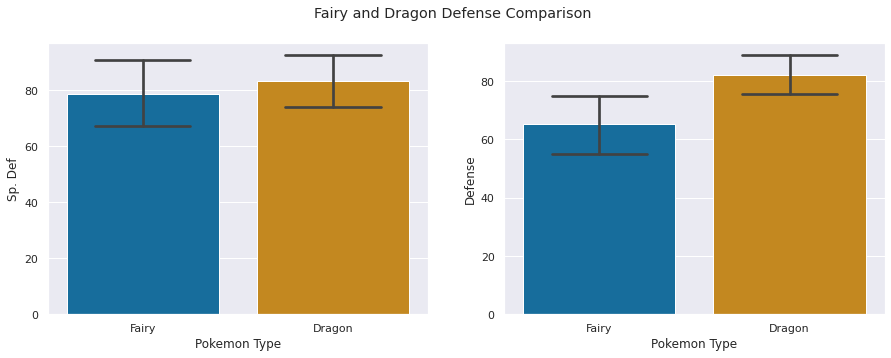

In [82]:
# Comparing fairy type defense and special defense against dragon types using a bar chart.
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(data=binary_dragon_fairy, x="Dragon_or_fairy", y="Sp. Def", ax=axes[0], capsize=0.5)
sns.barplot(data=binary_dragon_fairy, x="Dragon_or_fairy", y="Defense", ax=axes[1], capsize=0.5)

axes[0].set_xlabel('Pokemon Type')
axes[1].set_xlabel('Pokemon Type')

plt.suptitle('Fairy and Dragon Defense Comparison')
plt.show()

# Fairy types have a similar special defense rating to dragon types. This could prove helpful against special attacks
    # that aren't dragon type attacks (due to their natural immunity).

# Conclusion
The effectiveness of Fairy-type Pokémon in battles can depend on their Fairy-type moves, rather than their base type. When compared to Dragon-type Pokémon, Fairy-types tend to be weaker in all aspects, including special defense and attack. As a result, trainers should exercise caution when choosing a Fairy-type Pokémon to face a Dragon-type in battle. A better strategy may be to choose a Normal-type Pokémon with Fairy-type moves, as these are particularly effective against Dragon-type Pokémon. However, when a Fairy-type Pokémon is relying solely on its base stats, it is more likely to face a defeat against a Dragon-type.